## **Mapas do Espírito Santo**

### **Carregando o Mapa Base**

#### **Carregando Bibliotecas**

In [ ]:
# Instalando as bibliotecas necessárias para o projeto
%pip install pandas --quiet
%pip install geopandas --quiet
%pip install matplotlib --quiet
%pip install shapely --quiet
%pip install folium --quiet

In [12]:
# Importando as bibliotecas necessárias
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import MultiPolygon
import matplotlib.pyplot as plt
import folium

#### **Carregando o Shapefile**

In [13]:
# Carregando o shape do estado do Espírito Santo
gdf_ES = gpd.read_file('Shapes/ES_Municipios_2024.shp', encoding='cp1252')

In [14]:
# Atribuir o Coordinate Reference System - CRS (em geral, o IBGE usa o padrão SIRGAS 2000, cujo CRS é EPSG:4674)
gdf_ES = gdf_ES.set_crs("EPSG:4674")

In [15]:
# Exibindo os primeiros valores do dataframe
gdf_ES.head()

,CD_MUN,NM_MUN,CD_RGI,NM_RGI,CD_RGINT,NM_RGINT,CD_UF,NM_UF,SIGLA_UF,CD_REGIA,NM_REGIA,SIGLA_RG,CD_CONCU,NM_CONCU,AREA_KM2,geometry
0,3200409,Anchieta,320001,Vitória,3201,Vitória,32,Espírito Santo,ES,3,Sudeste,SE,None,None,409.691,"MULTIPOLYGON (((-40.68438 -20.82728, -40.68428..."
1,3203502,Montanha,320003,São Mateus,3202,São Mateus,32,Espírito Santo,ES,3,Sudeste,SE,None,None,1099.060,"POLYGON ((-40.34393 -18.28299, -40.34397 -18.2..."
2,3202207,Fundão,320001,Vitória,3201,Vitória,32,Espírito Santo,ES,3,Sudeste,SE,3205309,Vitória/ES,286.854,"POLYGON ((-40.19506 -20.03569, -40.19545 -20.0..."
3,3202256,Governador Lindenberg,320005,Colatina,3203,Colatina,32,Espírito Santo,ES,3,Sudeste,SE,None,None,360.016,"POLYGON ((-40.49596 -19.11354, -40.49529 -19.1..."
4,3204807,São José do Calçado,320008,Alegre,3204,Cachoeiro do Itapemirim,32,Espírito Santo,ES,3,Sudeste,SE,None,None,273.489,"POLYGON ((-41.62823 -20.86183, -41.62814 -20.8..."


In [16]:
# Checando os tipos de dados
gdf_ES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    78 non-null     object  
 1   NM_MUN    78 non-null     object  
 2   CD_RGI    78 non-null     object  
 3   NM_RGI    78 non-null     object  
 4   CD_RGINT  78 non-null     object  
 5   NM_RGINT  78 non-null     object  
 6   CD_UF     78 non-null     object  
 7   NM_UF     78 non-null     object  
 8   SIGLA_UF  78 non-null     object  
 9   CD_REGIA  78 non-null     object  
 10  NM_REGIA  78 non-null     object  
 11  SIGLA_RG  78 non-null     object  
 12  CD_CONCU  11 non-null     object  
 13  NM_CONCU  11 non-null     object  
 14  AREA_KM2  78 non-null     float64 
 15  geometry  78 non-null     geometry
dtypes: float64(1), geometry(1), object(14)
memory usage: 9.9+ KB


In [17]:
# Alterando o tipo de dados de CD_MUN para int64
gdf_ES['CD_MUN'] = gdf_ES['CD_MUN'].astype(int)

# Checando a alteração de tipo
gdf_ES.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    78 non-null     int32   
 1   NM_MUN    78 non-null     object  
 2   CD_RGI    78 non-null     object  
 3   NM_RGI    78 non-null     object  
 4   CD_RGINT  78 non-null     object  
 5   NM_RGINT  78 non-null     object  
 6   CD_UF     78 non-null     object  
 7   NM_UF     78 non-null     object  
 8   SIGLA_UF  78 non-null     object  
 9   CD_REGIA  78 non-null     object  
 10  NM_REGIA  78 non-null     object  
 11  SIGLA_RG  78 non-null     object  
 12  CD_CONCU  11 non-null     object  
 13  NM_CONCU  11 non-null     object  
 14  AREA_KM2  78 non-null     float64 
 15  geometry  78 non-null     geometry
dtypes: float64(1), geometry(1), int32(1), object(13)
memory usage: 9.6+ KB


<Axes: >

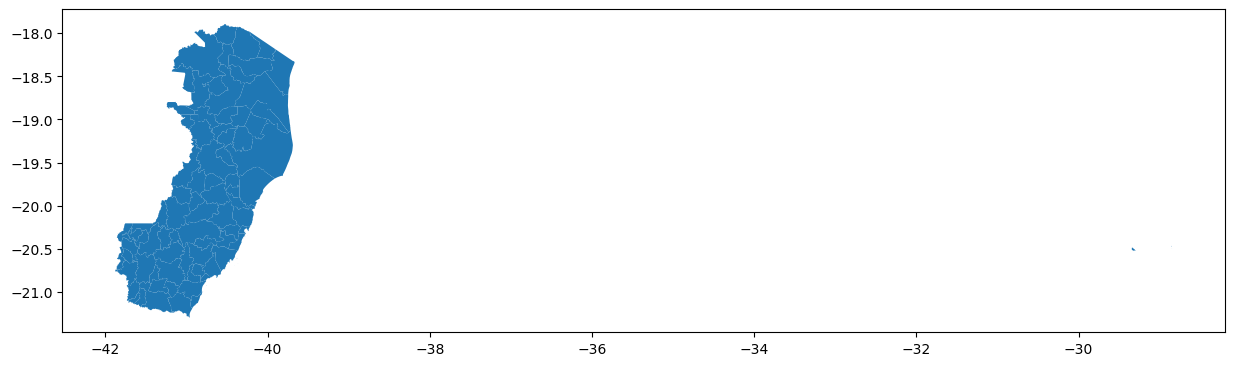

In [18]:
# Exibir o mapa para checar se está correto
gdf_ES.plot(figsize=(15, 15))

##### **Removendo o polígono da Ilha de Trindade**

In [19]:
# Isolar o multipolígono do município de Vitória com a Ilha de Trindade
vitoria_completo = gdf_ES[gdf_ES['NM_MUN'] == 'Vitória'].copy()

# Verificar o tipo e número de polígonos
geom = vitoria_completo.iloc[0].geometry

print("Tipo de geometria:", type(geom))
if isinstance(geom, MultiPolygon):
    print(f"Número de polígonos em Vitória: {len(geom.geoms)}")
    for i, poly in enumerate(geom.geoms):
        bounds = poly.bounds
        print(f"Polígono {i+1} - Bounds: {bounds}")

Tipo de geometria: <class 'shapely.geometry.multipolygon.MultiPolygon'>
Número de polígonos em Vitória: 13
Polígono 1 - Bounds: (-40.277155, -20.309472, -40.2753124, -20.3069311)
Polígono 2 - Bounds: (-40.2872739, -20.305246, -40.2870142, -20.3046598)
Polígono 3 - Bounds: (-40.2760905, -20.2986707, -40.275269, -20.2975307)
Polígono 4 - Bounds: (-40.2840531, -20.2935586, -40.2828619, -20.2919891)
Polígono 5 - Bounds: (-40.2820434, -20.2926727, -40.2816315, -20.2919756)
Polígono 6 - Bounds: (-40.2858766, -20.2847606, -40.2849759, -20.2839423)
Polígono 7 - Bounds: (-40.3623322, -20.3301596, -40.2149426, -20.2292009)
Polígono 8 - Bounds: (-29.3448706, -20.5282613, -29.2987839, -20.4867744)
Polígono 9 - Bounds: (-28.8505887, -20.4978936, -28.8476399, -20.4957887)
Polígono 10 - Bounds: (-28.8544053, -20.4794856, -28.8477591, -20.4718302)
Polígono 11 - Bounds: (-28.8558124, -20.4726365, -28.8551148, -20.4720147)
Polígono 12 - Bounds: (-28.8565385, -20.4706083, -28.8541915, -20.4679907)
Polígo

In [21]:
# Filtrar o GeoDataFrame para obter apenas a linha de Vitória
vitoria_completo_gdf = gdf_ES[gdf_ES['NM_MUN'] == 'Vitória'].copy()

# Acessar a geometria de Vitória com a Ilha de Trindade (MultiPolygon)
geometria_vitoria_completo = vitoria_completo_gdf.geometry.iloc[0]

# Verificar se é um MultiPolygon e acessar seus polígonos
if hasattr(geometria_vitoria_completo, 'geoms'):
    poligonos_vitoria_completo = list(geometria_vitoria_completo.geoms)
else:
    print("A geometria de Vitória não é um MultiPolygon!")
    poligonos_filtrados = [geometria_vitoria_completo] # Trata como uma lista de um único polígono

In [22]:
# Identificar e remover o Polígono 13 (índice 12)
poligono_vitoria_extra = poligonos_vitoria_completo.pop(12)

# Inserir o Polígono 13 na oitava posição (índice 7)
poligonos_vitoria_completo.insert(7, poligono_vitoria_extra)

# Criar uma nova lista contendo apenas os polígonos de Vitória (os primeiros 8)
poligonos_vitoria_continental = poligonos_vitoria_completo[:8]

# Criar um novo MultiPolygon com os polígonos de Vitória continental
vitoria_geo_real = MultiPolygon(poligonos_vitoria_continental)

# Atualizar a geometria no gdf_ES
gdf_ES.loc[gdf_ES['NM_MUN'] == 'Vitória', 'geometry'] = vitoria_geo_real

# Checando atualização dos polígonos de Vitória
vitoria = gdf_ES[gdf_ES['NM_MUN'] == 'Vitória']
geom = vitoria.iloc[0].geometry
print("Tipo de geometria:", type(geom))
if isinstance(geom, MultiPolygon):
    print(f"Número de polígonos em Vitória: {len(geom.geoms)}")
    for i, poly in enumerate(geom.geoms):
        bounds = poly.bounds
        print(f"Polígono {i+1} - Bounds: {bounds}")

Tipo de geometria: <class 'shapely.geometry.multipolygon.MultiPolygon'>
Número de polígonos em Vitória: 8
Polígono 1 - Bounds: (-40.277155, -20.309472, -40.2753124, -20.3069311)
Polígono 2 - Bounds: (-40.2872739, -20.305246, -40.2870142, -20.3046598)
Polígono 3 - Bounds: (-40.2760905, -20.2986707, -40.275269, -20.2975307)
Polígono 4 - Bounds: (-40.2840531, -20.2935586, -40.2828619, -20.2919891)
Polígono 5 - Bounds: (-40.2820434, -20.2926727, -40.2816315, -20.2919756)
Polígono 6 - Bounds: (-40.2858766, -20.2847606, -40.2849759, -20.2839423)
Polígono 7 - Bounds: (-40.3623322, -20.3301596, -40.2149426, -20.2292009)
Polígono 8 - Bounds: (-40.2751237, -20.3086915, -40.2736245, -20.3068429)


<Axes: >

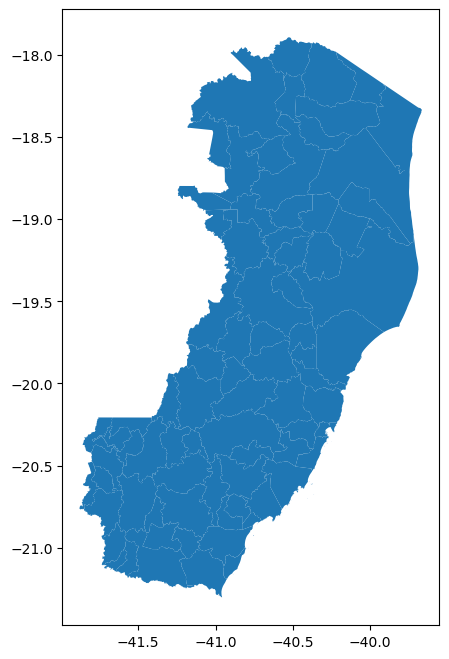

In [23]:
# Plotar novamente o mapa do ES para verificar o resultado
gdf_ES.plot(figsize=(8, 8))

##### **Simplificação da geometria e criação do arquivo GeoJSON**

In [24]:
# Simplificar a geometria para deixar o GeoJSON mais leve
gdf_ES.loc[:, 'geometry'] = gdf_ES['geometry'].simplify(tolerance=0.001, preserve_topology=True)

In [25]:
# Salvar como GeoJSON
gdf_ES.to_file('ES_Municipios_2024.geojson', driver='GeoJSON')

print("Conversão feita! GeoJSON salvo como 'ES_Municipios_2024.geojson'")

Conversão feita! GeoJSON salvo como 'ES_Municipios_2024.geojson'
